# Project: Wrangling and Analyze Data

In [6]:
import os
import json
import tweepy
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
from tweepy import OAuthHandler
import matplotlib.pyplot as plt
from timeit import default_timer as timer

pd.set_option("display.max_columns", None)

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [411]:
tweets_archive = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
file_name = 'image-predictions.tsv'
with open(file_name, mode='wb') as file:
    file.write(response.content)
file.close()

In [412]:
images = pd.read_csv('image-predictions.tsv',sep="\t")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [276]:
load_dotenv()

consumer_key = os.getenv("API_KEY")
consumer_secret = os.getenv("API_KEY_SECRET")
access_token = os.getenv("ACCESS_TOKEN")
access_secret = os.getenv("ACCESS_TOKEN_SECRET")

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [293]:
tweet_ids = tweets_archive.tweet_id.values

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict) #2296seconds

In [413]:
data = []
with open("tweet_json.txt", "r") as file:
    lines = file.readlines()
    for line in lines:
        raw = json.loads(line)
        data.append(raw)
    file.close()

In [414]:
tweets_df = pd.DataFrame(data)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Tweets Archive Dataset

In [417]:
tweets_archive.shape

(2356, 17)

In [418]:
tweets_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [419]:
tweets_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [420]:
tweets_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [421]:
tweets_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

#### TWitter API Dataset

In [422]:
tweets_df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [423]:
tweets_df.shape

(2327, 32)

In [424]:
tweets_archive.shape[0] - tweets_df.shape[0]

29

In [425]:
tweets_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,7009,33812,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,5302,29330,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,3481,22054,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,7226,36943,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,7761,35311,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [426]:
tweets_df.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
2322,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,37,89,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2323,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,115,247,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2324,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,36,100,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2325,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,39,112,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2326,Sun Nov 15 22:32:08 +0000 2015,666020888022790149,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,423,2293,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [427]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2327 non-null   object 
 1   id                             2327 non-null   int64  
 2   id_str                         2327 non-null   object 
 3   full_text                      2327 non-null   object 
 4   truncated                      2327 non-null   bool   
 5   display_text_range             2327 non-null   object 
 6   entities                       2327 non-null   object 
 7   extended_entities              2057 non-null   object 
 8   source                         2327 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     object 
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     o

In [428]:
tweets_df.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 270
source                              0
in_reply_to_status_id            2250
in_reply_to_status_id_str        2250
in_reply_to_user_id              2250
in_reply_to_user_id_str          2250
in_reply_to_screen_name          2250
user                                0
geo                              2327
coordinates                      2327
place                            2326
contributors                     2327
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                132
possibly_sensitive_appealable     132
lang        

#### Image predictions dataset

In [429]:
images.shape

(2075, 12)

In [430]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [431]:
images.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [432]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [433]:
images.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [434]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Quality issues
1. tweet_id is an integer not a string in tweets_archive and images tables.

2. wrong data types in tweet_archive table in the following columns; timestamp, retweeted_status_timestamp and tweet_id columns.

3. missing/null values in six columns of tweet_archive table : in_reply_to_user_id, in_reply_to_status_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_url.

4. "None" values in columns not recognised as missing values in the tweets_archive table.

5. wrong data type for "created_at" column in tweets_df table.

6. 29 missing records(2327 instead 2356 tweets_df).

7. different column name for tweets' ids: tweet_id and id/id_str.

8. some entries are retweets (i.e not original tweets) in tweets_archive and tweets_df tables.

9. some ratings are not dogs ratings.

10. several columns have missing values inmore than half of their entries.

### Tidiness issues
1. favorite_count, favorited, retweet_count, retweeted and is_quote_status columns in `tweets_df` table should be part of `tweets_archive` table.

2. one variable in two columns in `tweets_archive` tabele (ratings: rating_numerator, rating_denominator).

3. one variable in four columns in `tweets_archive` table (dog_stages: doggo, floofer, pupper and puppo).

4. ratings, name and dog stages columns in `tweets_archive` table should be part of `images` table.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [504]:
# Make copies of original pieces of data
tweets_archive_clean = tweets_archive.copy()
tweets_df_clean = tweets_df.copy()
images_clean = images.copy()

### Issue #1: wrong data types in tweet_archive table in the following columns; timestamp, retweeted_status_timestamp and tweet_id columns.

#### Define: use pandas astype method to assign appropriate data type to the column.

#### Code

In [505]:
tweets_archive_clean["timestamp"] = tweets_archive_clean["timestamp"].astype('datetime64[ns]')
tweets_archive_clean["retweeted_status_timestamp"] = tweets_archive_clean["retweeted_status_timestamp"].astype('datetime64[ns]')
tweets_archive_clean["tweet_id"] = tweets_archive_clean["tweet_id"].astype(str)

#### Test

In [506]:
tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    datetime64[ns]
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

### Issue #2: missing/null values in six columns of tweet_archive table : in_reply_to_user_id, in_reply_to_status_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_url.

#### Define
This simply implies those event/actions i.e retweet, reply did not take place.
As for the expanded url, I observed there are no url links for reply tweets, retweets and tweets without pictures in the dataset.

### Issue #3: "None" values in columns are not recognised as missing values in the tweets_archive table

#### Define
use pandas replace method to replace "None" values with np.nan in the tables

#### Code

In [507]:
tweets_archive_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [508]:
tweets_archive_clean.values == "None"

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

In [509]:
tweets_archive_clean = tweets_archive_clean.replace("None",np.nan)

#### Test

In [510]:
tweets_archive_clean.values == "None"

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [511]:
tweets_archive_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                           745
doggo                         2259
floofer                       2346
pupper                        2099
puppo                         2326
dtype: int64

### Issue #4: wrong data type for "created_at" column in tweets_df table.

#### Define
use pandas astype method to assign the appropriate data type to the column

#### Code

In [512]:
tweets_df_clean["created_at"].dtype

dtype('O')

In [513]:
tweets_df_clean["created_at"] = tweets_df_clean["created_at"].astype("datetime64[ns]")

#### Test

In [514]:
tweets_df_clean["created_at"].dtype

dtype('<M8[ns]')

In [515]:
tweets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   created_at                     2327 non-null   datetime64[ns]
 1   id                             2327 non-null   int64         
 2   id_str                         2327 non-null   object        
 3   full_text                      2327 non-null   object        
 4   truncated                      2327 non-null   bool          
 5   display_text_range             2327 non-null   object        
 6   entities                       2327 non-null   object        
 7   extended_entities              2057 non-null   object        
 8   source                         2327 non-null   object        
 9   in_reply_to_status_id          77 non-null     float64       
 10  in_reply_to_status_id_str      77 non-null     object        
 11  in_reply_to_user_

### Issue #5: 29 missing records(2327 instead 2356 tweets_df)

#### Define
During the data gathering step with Twitter API, tweets could not be retrieved from some ids in the tweets_archive dataset, probably because they have been deleted hence the missing records.

#### Code

#### Test

### Issue #6: different column names for ids: tweet_id and id/id_str.

#### Define
use pandas rename method to change ids column names to match each other.

#### Code

In [516]:
tweets_df_clean.columns 

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [517]:
tweets_df_clean = tweets_df_clean.rename(columns={"id":"tweet_id", "id_str":"tweet_id_str"})

#### Test

In [518]:
tweets_df_clean.columns 

Index(['created_at', 'tweet_id', 'tweet_id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

### Issue #7: some entries are retweets (i.e not original tweets) in tweets_archive and tweets_df tables.

#### Define
##### for tweets_archive table: using the "retweeted_status_id" column as a reference, whenever the value is null implies the tweet is an original tweet and if otherwise, it is a retweet.
##### for tweets_df table:  using the "retweeted_status" column as a reference, whenever the value is null implies the tweet is an original tweet and if otherwise, it is a retweet.

#### Code

In [519]:
tweets_archive_clean["retweeted_status_id"].isna().sum()

2175

In [520]:
tweets_df_clean["retweeted_status"].isna().sum()

2167

In [521]:
tweets_archive_clean = tweets_archive_clean[tweets_archive_clean["retweeted_status_id"].isna()]


In [522]:
tweets_df_clean = tweets_df_clean[tweets_df_clean["retweeted_status"].isna()]

#### Test

In [523]:
tweets_archive_clean.shape

(2175, 17)

In [524]:
tweets_df_clean.shape

(2167, 32)

### Issue #8: some ratings are not dogs' ratings.


#### Define
filter the images dataset for predictions of dogs only then merge the results with the tweets_archive dataset.

#### Code

In [525]:
images_clean.shape, tweets_archive_clean.shape

((2075, 12), (2175, 17))

In [526]:
images_clean["tweet_id"] = images_clean["tweet_id"].astype(str)
dog_tweets = images_clean[(images_clean.p1_dog == True)]
tweets_archive_clean = pd.merge(tweets_archive_clean, dog_tweets["tweet_id"], on=["tweet_id"], how="inner")

#### Test

In [527]:
tweets_archive_clean.shape

(1477, 17)

### Issue #9: several columns have missing values inmore than half of their entries.

#### Define
 create a custom fuction to drop columns if null values is more 60% of the data.

#### Code 

In [528]:
def drop_columns(dataframe):
    for column in dataframe.columns:
        if dataframe[column].isnull().sum()/dataframe.shape[0] >= 0.6:
            dataframe = dataframe.drop(column, axis=1)
            #print(column)
    return dataframe

In [529]:
tweets_archive_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         1463
in_reply_to_user_id           1463
timestamp                        0
source                           0
text                             0
retweeted_status_id           1477
retweeted_status_user_id      1477
retweeted_status_timestamp    1477
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                           363
doggo                         1419
floofer                       1469
pupper                        1325
puppo                         1457
dtype: int64

In [530]:
tweets_archive_clean = drop_columns(tweets_archive_clean)

#### Test

In [531]:
tweets_archive_clean.isnull().sum()

tweet_id                0
timestamp               0
source                  0
text                    0
expanded_urls           0
rating_numerator        0
rating_denominator      0
name                  363
dtype: int64

## Tidiness

### Issue #10: favorite_count, favorited, retweet_count, retweeted and is_quote_status columns in `tweets_df` table should be part of `tweets_archive` table

#### Define
extract the required columns from tweets_df table and merge (on "tweet_id") them to tweets_archive table.

#### Code

In [532]:
tweets_df_clean = tweets_df_clean[['tweet_id','favorite_count', 'favorited', 'retweet_count', 'retweeted', 'is_quote_status']]

In [533]:
tweets_archive_clean.shape

(1477, 8)

In [534]:
tweets_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name'],
      dtype='object')

In [535]:
tweets_df_clean['tweet_id'] = tweets_df_clean['tweet_id'].astype(str)
tweets_archive_clean = pd.merge(tweets_archive_clean, tweets_df_clean, on="tweet_id", how="left")

#### Test

In [536]:
tweets_archive_clean.shape, tweets_archive_clean.columns

((1477, 13),
 Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
        'rating_numerator', 'rating_denominator', 'name', 'favorite_count',
        'favorited', 'retweet_count', 'retweeted', 'is_quote_status'],
       dtype='object'))

### Issue #11: one variable in two columns in `tweets_archive` tabele (ratings: rating_numerator, rating_denominator).

#### Define
divide "rating_numerator" by "rating_denominator" and designate the results to a new column named "ratings"


#### Code

In [537]:
tweets_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorite_count',
       'favorited', 'retweet_count', 'retweeted', 'is_quote_status'],
      dtype='object')

In [538]:
tweets_archive_clean["rating_numerator"] = tweets_archive_clean["rating_numerator"].replace(75,9.75)
#spotted this error by chance during visual inspection so i replaced the value accordingly

In [539]:
tweets_archive_clean["ratings_str"] = tweets_archive_clean["rating_numerator"].astype(str) + "/" + tweets_archive_clean["rating_denominator"].astype(str)
tweets_archive_clean["ratings"] = tweets_archive_clean["rating_numerator"]  / tweets_archive_clean["rating_denominator"]

In [540]:
tweets_archive_clean = tweets_archive_clean.drop(["rating_denominator", "rating_numerator"], axis=1)

#### Test

In [541]:
tweets_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'favorite_count', 'favorited', 'retweet_count', 'retweeted',
       'is_quote_status', 'ratings_str', 'ratings'],
      dtype='object')

### Issue #12: one variable in four columns in `tweets_archive` table (dog_stages: doggo, floofer, pupper and puppo)

#### Define:
I was going to use pandas melt function on the four columns but realized the columns had to many missing values hence i concluded on dropping them as valuable cannot be derived from them. Hence i will not be creating the new column "dog stages".

### Issue #13: ratings, name, dog stages columns in `tweets_archive` table should be part of `images` table

#### Define
Use pandas merge function to join the above columns to the images dataset and drop them from the `tweets_archive` dataset. N.B there is no "dog stages" column as it was dropped earlier.

#### Code

In [542]:
images_clean.shape

(2075, 12)

In [543]:
columns = tweets_archive_clean[["tweet_id", "ratings", "ratings_str", "name"]]
images_clean = pd.merge(images_clean, columns, on="tweet_id", how="left")

In [544]:
tweets_archive_clean = tweets_archive_clean.drop(["ratings", "ratings_str", "name"], axis=1)

#### Test

In [545]:
images_clean.shape # should have same number of rows as former image_clean dataset but two additional columns.

(2075, 15)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [546]:
images_clean = images_clean[(images_clean.p1_dog == True)]

In [547]:
tweets_archive_clean.to_csv("twitter_archive_master.csv", index=False)
images_clean.to_csv("dogs_information.csv",index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

#### I will bw using "twitter_archive_master.csv" and "dogs_information.csv" datasets for my analysis.

In [548]:
tweets = pd.read_csv("twitter_archive_master.csv",parse_dates=['timestamp'], index_col='timestamp')
dogs_info = pd.read_csv("dogs_information.csv")

In [549]:
tweets.tweet_id = tweets.tweet_id.astype(str)
dogs_info.tweet_id = dogs_info.tweet_id.astype(str)

In [550]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1477 entries, 2017-08-01 00:17:27 to 2015-11-15 22:32:08
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1477 non-null   object 
 1   source           1477 non-null   object 
 2   text             1477 non-null   object 
 3   expanded_urls    1477 non-null   object 
 4   favorite_count   1469 non-null   float64
 5   favorited        1469 non-null   object 
 6   retweet_count    1469 non-null   float64
 7   retweeted        1469 non-null   object 
 8   is_quote_status  1469 non-null   object 
dtypes: float64(2), object(7)
memory usage: 115.4+ KB


In [551]:
tweets.head()

,tweet_id,source,text,expanded_urls,favorite_count,favorited,retweet_count,retweeted,is_quote_status
timestamp,,,,,,,,,
2017-08-01 00:17:27,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,29330.0,False,5302.0,False,False
2017-07-31 00:18:03,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,22054.0,False,3481.0,False,False
2017-07-29 16:00:24,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,35311.0,False,7761.0,False,False
2017-07-29 00:08:17,891087950875897856,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,17813.0,False,2602.0,False,False
2017-07-28 16:27:12,890971913173991426,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",10364.0,False,1663.0,False,False


In [552]:
tweets.shape

(1477, 9)

In [553]:
tweets.isnull().sum()

tweet_id           0
source             0
text               0
expanded_urls      0
favorite_count     8
favorited          8
retweet_count      8
retweeted          8
is_quote_status    8
dtype: int64

In [554]:
tweets.describe()

,favorite_count,retweet_count
count,1469.000000,1469.000000
mean,8003.605854,2250.495575
std,11683.130743,4096.515983
min,66.000000,11.000000
25%,1831.000000,523.000000
50%,3786.000000,1137.000000
75%,9941.000000,2595.000000
max,144902.000000,70750.000000


In [555]:
tweets.groupby('timestamp')['retweet_count'].sum()

timestamp
2015-11-15 22:32:08     423.0
2015-11-15 23:05:30      39.0
2015-11-15 23:21:54      36.0
2015-11-16 00:04:52     115.0
2015-11-16 00:24:50      37.0
                        ...  
2017-07-28 16:27:12    1663.0
2017-07-29 00:08:17    2602.0
2017-07-29 16:00:24    7761.0
2017-07-31 00:18:03    3481.0
2017-08-01 00:17:27    5302.0
Name: retweet_count, Length: 1477, dtype: float64

In [556]:
dogs_info.shape

(1532, 15)

In [557]:
dogs_info.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,ratings,ratings_str,name
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,0.8,8.0/10,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,0.7,7.0/10,a
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,0.9,9.0/10,a
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,0.6,6.0/10,a
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,0.5,5.0/10,NaN


In [558]:
dogs_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     1532 non-null   object 
 1   jpg_url      1532 non-null   object 
 2   img_num      1532 non-null   int64  
 3   p1           1532 non-null   object 
 4   p1_conf      1532 non-null   float64
 5   p1_dog       1532 non-null   bool   
 6   p2           1532 non-null   object 
 7   p2_conf      1532 non-null   float64
 8   p2_dog       1532 non-null   bool   
 9   p3           1532 non-null   object 
 10  p3_conf      1532 non-null   float64
 11  p3_dog       1532 non-null   bool   
 12  ratings      1477 non-null   float64
 13  ratings_str  1477 non-null   object 
 14  name         1114 non-null   object 
dtypes: bool(3), float64(4), int64(1), object(7)
memory usage: 148.2+ KB


In [559]:
dogs_info.isnull().sum()

tweet_id         0
jpg_url          0
img_num          0
p1               0
p1_conf          0
p1_dog           0
p2               0
p2_conf          0
p2_dog           0
p3               0
p3_conf          0
p3_dog           0
ratings         55
ratings_str     55
name           418
dtype: int64

In [560]:
dogs_info.describe()

,img_num,p1_conf,p2_conf,p3_conf,ratings
count,1532.000000,1532.000000,1532.000000,1.532000e+03,1477.000000
mean,1.212794,0.613823,0.141327,6.180374e-02,1.094666
std,0.574115,0.259735,0.102482,5.255780e-02,0.190555
min,1.000000,0.044333,0.000023,2.160900e-07,0.200000
25%,1.000000,0.390981,0.057067,1.540992e-02,1.000000
50%,1.000000,0.614025,0.127964,4.995100e-02,1.100000
75%,1.000000,0.850559,0.203748,9.527215e-02,1.200000
max,4.000000,0.999956,0.467678,2.734190e-01,3.428571


In [561]:
dogs_info[dogs_info.ratings == dogs_info.ratings.max()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,ratings,ratings_str,name
1201,810984652412424192,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,3.428571,24.0/7,Sam


In [562]:
dogs_info.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
silky_terrier           1
groenendael             1
Japanese_spaniel        1
clumber                 1
EntleBucher             1
Name: p1, Length: 111, dtype: int64

In [563]:
dogs_info.name.value_counts().to_frame().head(6)

,name
a,43
Charlie,10
Cooper,10
Oliver,9
Tucker,8
Lucy,8


In [574]:
dogs_info.groupby('p1')['ratings'].sum().sort_values(ascending=False).to_frame()

,ratings
p1,
golden_retriever,162.546753
Labrador_retriever,105.700000
Pembroke,100.700000
Chihuahua,84.600000
pug,55.300000
...,...
standard_schnauzer,1.200000
EntleBucher,1.100000
groenendael,1.000000


### Insights:
1. Most rated dogs breed is golden_retriever, probably because they are more in the dataset. 

2. 25% of the dogs' ratings is above 1.2 and 75% of the ratings is below 1.2.

3. Dog breed with the highest rating is golden_retriever , a dog named Sam.

4. Dog breed with the lowest rating is Maltese_dog and Great_Dane.

5. Most common dog names are Charlie and Cooper.

6. On average a dog is rated 1.09 (~10/10).

7. On average a tweet has ~8003 likes and ~2250 retweets.

### Visualization

In [566]:
timeline = tweets.resample('M').sum()
timeline = timeline.reset_index()
timeline["month_year"] = pd.to_datetime(timeline["timestamp"]).dt.to_period("M")
timeline.head()

,timestamp,favorite_count,retweet_count,month_year
0,2015-11-30,198092.0,73801.0,2015-11
1,2015-12-31,650593.0,258116.0,2015-12
2,2016-01-31,386202.0,130777.0,2016-01
3,2016-02-29,292220.0,100129.0,2016-02
4,2016-03-31,349069.0,112806.0,2016-03


In [567]:
status = tweets.tweet_id.resample('D').count()
status = status.reset_index()
status["month_year"] = pd.to_datetime(status["timestamp"]).dt.to_period("M")
status.sort_values(by="tweet_id", ascending=False).head()

,timestamp,tweet_id,month_year
14,2015-11-29,19,2015-11
4,2015-11-19,19,2015-11
1,2015-11-16,18,2015-11
10,2015-11-25,14,2015-11
23,2015-12-08,14,2015-12


In [568]:
def barplot(dataframe, x, y, title):
    plt.figure(figsize=(14,8))
    sns.barplot(data=dataframe, x=x, y=y)
    sns.despine()
    plt.title(title, fontsize=20)
    plt.xticks(rotation=45)
    plt.xlabel(x, fontsize=20)
    plt.ylabel(y, fontsize=20)
    plt.tick_params(axis="both", which="major", labelsize=15)
    plt.show()


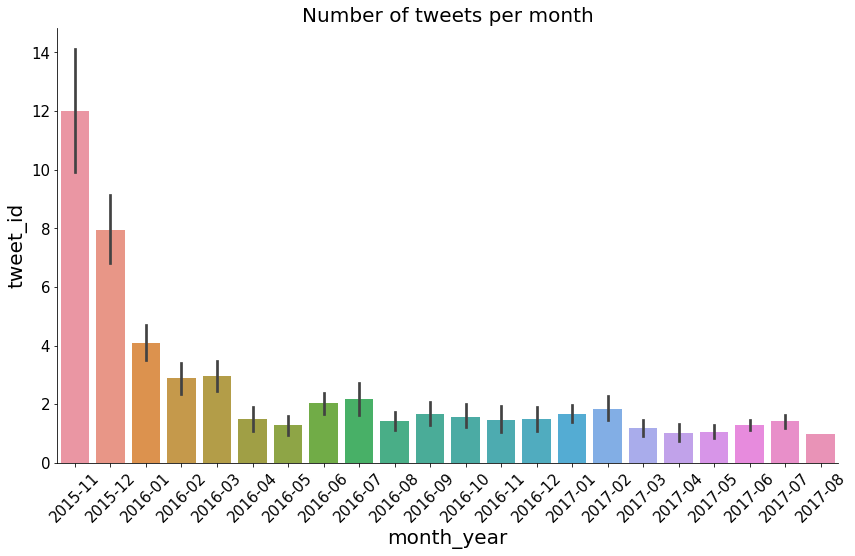

In [575]:
barplot(status,"month_year","tweet_id","Number of tweets per month")


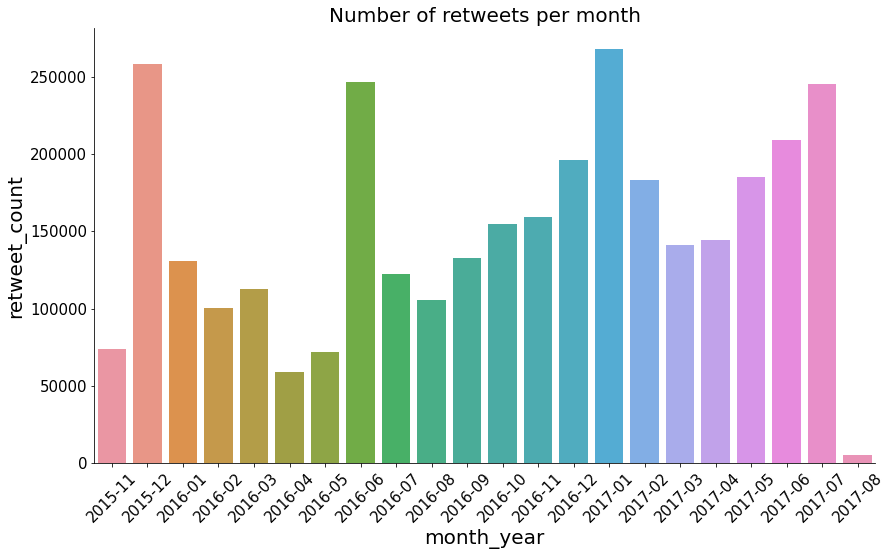

In [576]:
barplot(timeline,"month_year","retweet_count","Number of retweets per month")

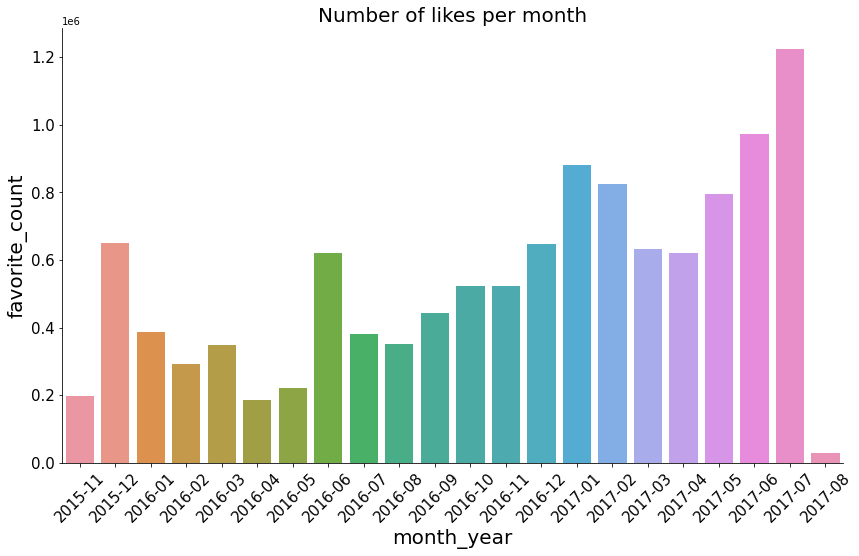

In [572]:
barplot(timeline,"month_year","favorite_count","Number of likes per month")